In [1]:
# Impor Library yang di butuhkan
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Memuat dataset MNIST (dataset angka tulisan tangan)
# Anda bisa menggantinya dengan dataset gambar Lain
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
# Preprocessing data
# Mengubah dimensi data dan melakukan normalisasi (membuat nilai antara e dan 1)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255 
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [11]:
train_labels = tf.keras.utils.to_categorical(train_labels,10)
test_labels = tf.keras.utils.to_categorical(test_labels,10)

In [17]:
# Membangun model CNN
model = models.Sequential()
# Menambahkan Layer konvolusi pertama
model.add(layers.Conv2D (32, (3, 3), activation ='relu', input_shape=(28, 28, 1)))
# Menambahkan Layer pooling (pengurangan dimensi)
model.add(layers.MaxPooling2D((2, 2)))
# Menambahkan Layer konvolusi kedua 
model.add(layers.Conv2D (64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# Menambahkan Layer konvolusi ketiga 
model.add(layers.Conv2D (64, (3, 3), activation ='relu'))
# Menambahkan Layer dense (fully connected Layer)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax')) # Output 10 kelas (untuk klasifikasi 0-9)
# Melihat arsitektur model
model.summary()
# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#Melatih model
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

D:\ANACONDA\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.8952 - loss: 0.3431 - val_accuracy: 0.9866 - val_loss: 0.0454
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9851 - loss: 0.0490 - val_accuracy: 0.9889 - val_loss: 0.0365
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9895 - loss: 0.0327 - val_accuracy: 0.9897 - val_loss: 0.0297
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9927 - loss: 0.0218 - val_accuracy: 0.9830 - val_loss: 0.0587
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9942 - loss: 0.0183 - val_accuracy: 0.9914 - val_loss: 0.0296


313/313 - 1s - 4ms/step - accuracy: 0.9914 - loss: 0.0296
Akurasi pada data uji: 0.9914


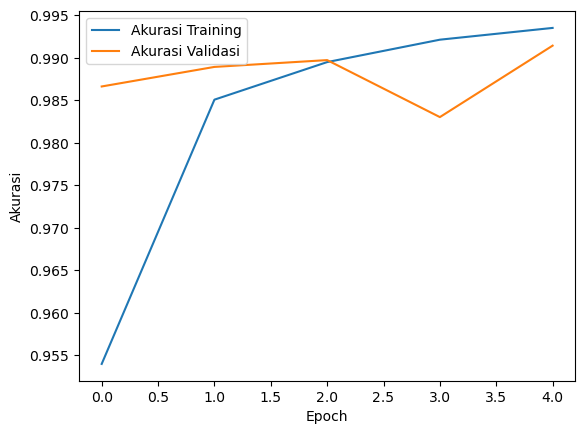

In [23]:
#Evaluasi model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2) 
print(f'Akurasi pada data uji: {test_acc:.4f}')

# Plot hasil akurasi dan Loss
plt.plot(history.history['accuracy'], label='Akurasi Training')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.show()